In [136]:
import io
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
from scipy.misc import toimage
from matplotlib import cm

In [137]:
model = models.alexnet(pretrained = True)

In [138]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Scale(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

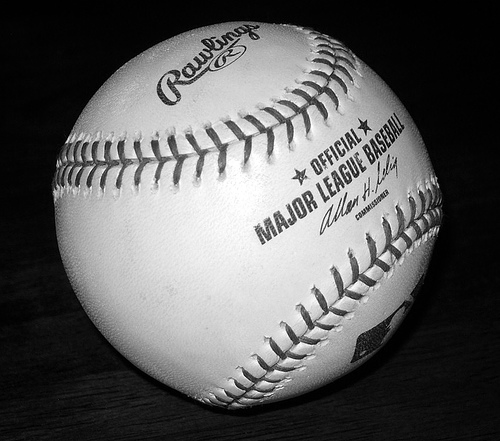

In [158]:
IMG_URL = 'http://farm1.static.flickr.com/56/107819021_075c21a259.jpg'
response = requests.get(IMG_URL)
img_pil = Image.open(io.BytesIO(response.content)).convert('LA').convert('RGB')
img_pil

In [159]:
img_tensor = preprocess(img_pil)
img_tensor.unsqueeze_(0)

tensor([[[[-2.0665, -2.0837, -2.0665,  ..., -2.0837, -2.0837, -2.0837],
          [-2.0837, -2.0665, -2.0837,  ..., -2.1008, -2.1179, -2.1008],
          [-2.0837, -2.0665, -2.0665,  ..., -2.1008, -2.1179, -2.1008],
          ...,
          [-1.8782, -1.9124, -1.9467,  ..., -1.8268, -1.8268, -1.8610],
          [-1.8610, -1.9124, -1.8953,  ..., -1.8610, -1.8782, -1.8782],
          [-1.9124, -1.8610, -1.8782,  ..., -1.8953, -1.8439, -1.8782]],

         [[-1.9832, -2.0007, -1.9832,  ..., -2.0007, -2.0007, -2.0007],
          [-2.0007, -1.9832, -2.0007,  ..., -2.0182, -2.0357, -2.0182],
          [-2.0007, -1.9832, -1.9832,  ..., -2.0182, -2.0357, -2.0182],
          ...,
          [-1.7906, -1.8256, -1.8606,  ..., -1.7381, -1.7381, -1.7731],
          [-1.7731, -1.8256, -1.8081,  ..., -1.7731, -1.7906, -1.7906],
          [-1.8256, -1.7731, -1.7906,  ..., -1.8081, -1.7556, -1.7906]],

         [[-1.7522, -1.7696, -1.7522,  ..., -1.7696, -1.7696, -1.7696],
          [-1.7696, -1.7522, -

In [160]:
img_variable = Variable(img_tensor)
fc_out = model(img_variable)
fc_out

tensor([[ -3.7335,   4.5893,  10.1478,  13.8474,  -1.0258,   3.9265,   7.6428,
          -3.2487,  -0.9665,  -8.8898,  -7.3754,  -7.1411,  -6.4196,  -4.6344,
          -7.5147,  -7.0940,  -3.1753,  -1.4791,  -0.7732,  -8.6071,  -6.5026,
          -6.8474,  -6.3153,  -2.7603,  -3.7394,  -6.0410,  -5.4897,  -0.5103,
          -3.8152,   1.4505,  -8.6018,  -9.3662,  -5.8988,  -4.5522,  -3.2821,
          -5.2648,  -5.4347,  -5.3004,   1.4724,  -1.1111,  -1.9778,  -0.7315,
          -2.3973,  -2.9222,  -4.2537,  -0.5580,  -0.7138,  -0.0586,  -8.2962,
          -3.1514,   0.7245,   2.7996,   0.3762,   2.3122,   6.3263,  -5.8908,
           7.0636,  -4.6647,   0.9677,  -5.0125,   1.5509,  -0.4573,  -0.2433,
          -2.2054,  -1.3345,   7.2694,  -0.5402,  -3.0436,  -2.2504,   6.3065,
          -6.4695,  -1.2663,  -1.6018,  -4.6628,  -5.4509,  -2.8884,   1.6230,
          -3.2206,   3.1181,   5.5057,  -2.8374,  -3.5562,   1.3531,  -1.7486,
          -2.2507,  -1.3058,   3.4948,   1.9341,   0

In [161]:
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

labels1 = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}

In [170]:
print(labels1[fc_out.data.numpy().argmax()])
#labels[250]
oneHotVector = fc_out.data.numpy()
np.shape(oneHotVector)
#np.amax(fc_out.data.numpy())


baseball


(1, 1000)